# Projet AirBnB

### Installation et activation de packages

In [1]:
install.packages('data.table')
install.packages('R.utils')
install.packages('bit64')
install.packages('leaflet')
install.packages('magrittr')
install.packages('htmltools')
install.packages('rgdal')

package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpANbHq5\downloaded_packages
package 'R.utils' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpANbHq5\downloaded_packages
package 'bit64' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpANbHq5\downloaded_packages
package 'leaflet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpANbHq5\downloaded_packages
package 'magrittr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpANbHq5\downloaded_packages
package 'geojsonio' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpANbHq5\downloaded_packages
packag

Warning message:
"cannot remove prior installation of package 'htmltools'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\user\anaconda3\Lib\R\library\00LOCK\htmltools\libs\x64\htmltools.dll to C:\Users\user\anaconda3\Lib\R\library\htmltools\libs\x64\htmltools.dll: Permission denied"Warning message:
"restored 'htmltools'"


The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpANbHq5\downloaded_packages

  There is a binary version available but the source version is later:
      binary source needs_compilation
rgdal 1.5-18 1.5-19              TRUE

  Binaries will be installed
package 'rgdal' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpANbHq5\downloaded_packages


In [2]:
library(data.table)
library(dplyr)
library(ggplot2)
library(R.utils)
library(bit64)
library(repr)
library(stringr)
library(leaflet)
library(htmltools)
library(rgdal)

Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'R.utils' was built under R version 3.6.3"Loading required package: R.oo
Warning message:
"package 'R.oo' was built under R version 3.6.3"Loading required package: R.methodsS3
Warning message:
"package 'R.methodsS3' was built under R version 3.6.3"R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.
R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.

Attaching package: 'R.oo'

The following object is masked from

### Chargement des données

In [3]:
listings <- fread("http://data.insideairbnb.com/france/ile-de-france/paris/2020-10-12/data/listings.csv.gz", encoding = 'UTF-8')

head(listings,10)

id    listing_url                        scrape_id      last_scraped
1   2577 https://www.airbnb.com/rooms/2577  20201012032825 2020-10-19  
2   3109 https://www.airbnb.com/rooms/3109  20201012032825 2020-10-18  
3   4886 https://www.airbnb.com/rooms/4886  20201012032825 2020-10-18  
4   4890 https://www.airbnb.com/rooms/4890  20201012032825 2020-10-14  
5   5396 https://www.airbnb.com/rooms/5396  20201012032825 2020-10-15  
6   7397 https://www.airbnb.com/rooms/7397  20201012032825 2020-10-16  
7   7964 https://www.airbnb.com/rooms/7964  20201012032825 2020-10-18  
8   9359 https://www.airbnb.com/rooms/9359  20201012032825 2020-10-16  
9   9952 https://www.airbnb.com/rooms/9952  20201012032825 2020-10-16  
10 10586 https://www.airbnb.com/rooms/10586 20201012032825 2020-10-19  
   name                                            
1  Loft for 4 by Canal Saint Martin                
2  zen and calm                                    
3  Country-Style Studio Hip Area FREE CRUISE & WIFI
4  Quiet Historic & Cute  +Free Cruise             
5  Explore the heart of old Paris                  
6  MARAIS - 2ROOMS APT - 2/4 PEOPLE                
7  Large & sunny flat with balcony !               
8  Cozy, Central Paris: WALK or VELIB EVERYWHERE ! 
9  Paris petit coin douillet                       
10 Montmartre Studio 7                             
   description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
1  100 m2 loft (1100 sq feet) with high ceiling, open modern kitchen, cable tv, wifi, sleeping space up to 5 people, Republique area, 5 minutes from the St Martin Canal, Marais area, 10 min from Chatelet and the Louvre.<br /><br /><b>The space</b><br />The district has any service or shop you may desire at a walking distance, many restaurants and clubs as well. <br />I will be pleased to suggest our best addresses and give you directions to have a very enjoyable journey. <br />We have 1 separated bedroom and one mezzanine for the second bed. One bathroom is ""en suite"" to the main bedroom. <br />Welcome to our beautiful loft!<br />Karine                                                                                                                                                                                                                                                                                                                                                                     
2  <b>The space</b><br />I bedroom appartment in Paris 14                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [4]:
calendar <- fread("http://data.insideairbnb.com/france/ile-de-france/paris/2020-10-12/data/calendar.csv.gz", encoding = 'UTF-8')
head(calendar)

listing_id date       available price   adjusted_price minimum_nights
1  2577      2020-10-19 f         $125.00 $125.00        3             
2 73533      2020-10-20 t         $95.00  $95.00         2             
3 73533      2020-10-21 t         $95.00  $95.00         2             
4 73533      2020-10-22 t         $95.00  $95.00         2             
5 73533      2020-10-23 t         $95.00  $95.00         2             
6 73533      2020-10-24 t         $95.00  $95.00         2             
  maximum_nights
1 1125          
2 1125          
3 1125          
4 1125          
5 1125          
6 1125

# Phase d'exploration des données

### listings

In [5]:
dim(listings)

[1] 66334    74

In [6]:
summary(listings)

       id           listing_url          scrape_id             
 Min.   :    2577   Length:66334       Min.   :20201012032825  
 1st Qu.:11749304   Class :character   1st Qu.:20201012032825  
 Median :23665724   Mode  :character   Median :20201012032825  
 Mean   :23785998                      Mean   :20201012032825  
 3rd Qu.:36592924                      3rd Qu.:20201012032825  
 Max.   :45828064                      Max.   :20201012032825  
                                                               
  last_scraped            name           description       
 Min.   :2020-10-12   Length:66334       Length:66334      
 1st Qu.:2020-10-14   Class :character   Class :character  
 Median :2020-10-16   Mode  :character   Mode  :character  
 Mean   :2020-10-16                                        
 3rd Qu.:2020-10-18                                        
 Max.   :2020-10-24                                        
                                                           
 neighbo

In [7]:
sapply(listings, class)

$id
[1] "integer"

$listing_url
[1] "character"

$scrape_id
[1] "integer64"

$last_scraped
[1] "IDate" "Date" 

$name
[1] "character"

$description
[1] "character"

$neighborhood_overview
[1] "character"

$picture_url
[1] "character"

$host_id
[1] "integer"

$host_url
[1] "character"

$host_name
[1] "character"

$host_since
[1] "IDate" "Date" 

$host_location
[1] "character"

$host_about
[1] "character"

$host_response_time
[1] "character"

$host_response_rate
[1] "character"

$host_acceptance_rate
[1] "character"

$host_is_superhost
[1] "character"

$host_thumbnail_url
[1] "character"

$host_picture_url
[1] "character"

$host_neighbourhood
[1] "character"

$host_listings_count
[1] "integer"

$host_total_listings_count
[1] "integer"

$host_verifications
[1] "character"

$host_has_profile_pic
[1] "character"

$host_identity_verified
[1] "character"

$neighbourhood
[1] "character"

$neighbourhood_cleansed
[1] "character"

$neighbourhood_group_cleansed
[1] "logical"

$latitude
[1] "numeric"

$longitude
[1] "numeric"

$property_type
[1] "character"

$room_type
[1] "character"

$accommodates
[1] "integer"

$bathrooms
[1] "logical"

$bathrooms_text
[1] "character"

$bedrooms
[1] "integer"

$beds
[1] "integer"

$amenities
[1] "character"

$price
[1] "character"

$minimum_nights
[1] "integer"

$maximum_nights
[1] "integer"

$minimum_minimum_nights
[1] "integer"

$maximum_minimum_nights
[1] "integer"

$minimum_maximum_nights
[1] "integer"

$maximum_maximum_nights
[1] "integer"

$minimum_nights_avg_ntm
[1] "numeric"

$maximum_nights_avg_ntm
[1] "numeric"

$calendar_updated
[1] "logical"

$has_availability
[1] "character"

$availability_30
[1] "integer"

$availability_60
[1] "integer"

$availability_90
[1] "integer"

$availability_365
[1] "integer"

$calendar_last_scraped
[1] "IDate" "Date" 

$number_of_reviews
[1] "integer"

$number_of_reviews_ltm
[1] "integer"

$number_of_reviews_l30d
[1] "integer"

$first_review
[1] "IDate" "Date" 

$last_review
[1] "IDate" "Date" 

$review_scores_rating
[1] "integer"

$review_scores_accuracy
[1] "integer"

$review_scores_cleanliness
[1] "integer"

$review_scores_checkin
[1] "integer"

$review_scores_communication
[1] "integer"

$review_scores_location
[1] "integer"

$review_scores_value
[1] "integer"

$license
[1] "character"

$instant_bookable
[1] "character"

$calculated_host_listings_count
[1] "integer"

$calculated_host_listings_count_entire_homes
[1] "integer"

$calculated_host_listings_count_private_rooms
[1] "integer"

$calculated_host_listings_count_shared_rooms
[1] "integer"

$reviews_per_month
[1] "numeric"

In [8]:
#valeurs manquantes
sum(is.na(listings))
#Pourcentage de valeurs manquantes
(sum(is.na(listings))/(dim(listings)[1]*dim(listings)[2])) * 100

[1] 372930

[1] 7.597302

### Calendar

In [9]:
dim(calendar)

[1] 24214662        7

In [10]:
summary(calendar)

   listing_id            date             available            price          
 Min.   :    2577   Min.   :2020-10-12   Length:24214662    Length:24214662   
 1st Qu.:11747334   1st Qu.:2021-01-15   Class :character   Class :character  
 Median :23665730   Median :2021-04-16   Mode  :character   Mode  :character  
 Mean   :23785922   Mean   :2021-04-16                                        
 3rd Qu.:36592934   3rd Qu.:2021-07-16                                        
 Max.   :45828064   Max.   :2021-10-23                                        
                                                                              
 adjusted_price     minimum_nights     maximum_nights     
 Length:24214662    Min.   :   1.000   Min.   :1.000e+00  
 Class :character   1st Qu.:   2.000   1st Qu.:3.100e+01  
 Mode  :character   Median :   3.000   Median :1.125e+03  
                    Mean   :   6.038   Mean   :9.804e+04  
                    3rd Qu.:   4.000   3rd Qu.:1.125e+03  
              

In [11]:
sapply(calendar, class)

$listing_id
[1] "integer"

$date
[1] "IDate" "Date" 

$available
[1] "character"

$price
[1] "character"

$adjusted_price
[1] "character"

$minimum_nights
[1] "integer"

$maximum_nights
[1] "integer"

In [12]:
#valeurs manquantes
sum(is.na(calendar))
#Pourcentage de valeurs manquantes
(sum(is.na(calendar))/(dim(calendar)[1]*dim(calendar)[2])) * 100

[1] 14974

[1] 0.008834081

# I- ETUDE 1
## A- Number of listings by neighborhood

#### Création d'un nouveau dataset listingsNeighbourhood pour l'étude des listings par quartier 


In [13]:
listingsNeighbourhood <- listings %>% group_by(neighbourhood_cleansed) %>% summarise(Number_of_listing= length(id))
listingsNeighbourhood 

`summarise()` ungrouping output (override with `.groups` argument)


neighbourhood_cleansed Number_of_listing
1  Batignolles-Monceau    4494             
2  Bourse                 2286             
3  Buttes-Chaumont        3813             
4  Buttes-Montmartre      7474             
5  Élysée                 1789             
6  Entrepôt               4628             
7  Gobelins               2330             
8  Hôtel-de-Ville         2009             
9  Louvre                 1394             
10 Luxembourg             1958             
11 Ménilmontant           3825             
12 Observatoire           2548             
13 Opéra                  3235             
14 Palais-Bourbon         1829             
15 Panthéon               2198             
16 Passy                  3267             
17 Popincourt             6459             
18 Reuilly                2731             
19 Temple                 3090             
20 Vaugirard              4977

#### Représentation graphique "Number of listings by neighborhood"

Note: la premiere ligne( #options(repr.plot...) mis en commentaire permet d'ajuster la taille du graphe si besoin.

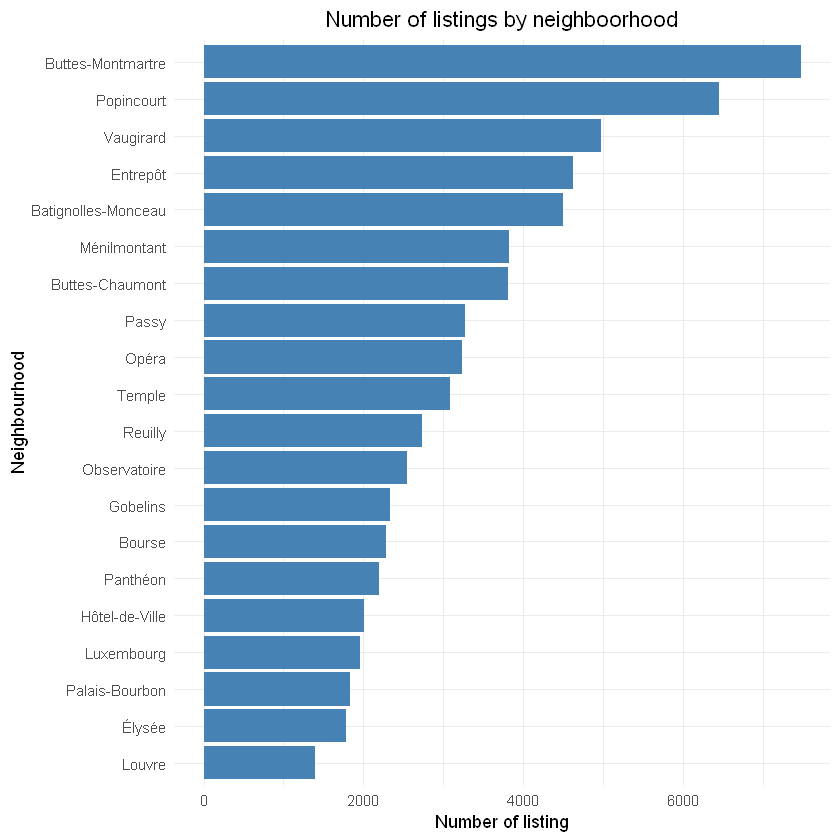

In [14]:
#options(repr.plot.width=8, repr.plot.height=8)
ggplot(listingsNeighbourhood , aes(x= Number_of_listing , y= reorder(neighbourhood_cleansed, Number_of_listing))) +
ggtitle("Number of listings by neighboorhood") +
geom_bar(stat="identity", fill= "steelblue" ,position="dodge" ) +  theme(plot.title = element_text(hjust = 0.5)) +
ylab("Neighbourhood") + xlab("Number of listing") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))
  

# Etude II
### Property type in Paris

Créons un nouveau dataset listing1

In [15]:
listings1 <-listings

Identifions les différents levels de la variable room_types

In [16]:
listings1$room_type<-as.factor(listings1$room_type)
summary(listings1$room_type)

Entire home/apt      Hotel room    Private room     Shared room 
          57184            1382            7359             409

Ici on regroupe les modalités de la variable property_type avant de la transormer en factor pour les besoins de notre analyse

In [17]:
listings1$property_type  <-  case_when(
  grepl("apartment", listings1$property_type) | grepl("apt", listings1$property_type)  ~ "Appartement",
   grepl("townhouse", listings1$property_type) | grepl("Townhouse", listings1$property_type) ~ "Townhouse",
    grepl("house", listings1$property_type) | grepl("place", listings1$property_type) ~ "House",
     grepl("bed and breakfast", listings1$property_type)  ~ "Bed and breakfast",
     grepl("loft", listings1$property_type) | grepl("Loft", listings1$property_type)  ~ "Loft",
     grepl("condominium", listings1$property_type) | grepl("Condominium", listings1$property_type) ~ "condominium",
     grepl("boat", listings1$property_type) ~ "Boat",
     grepl("guest suite", listings1$property_type)| grepl("floor", listings1$property_type) ~ "Guest suite",
     grepl("hostel", listings1$property_type) | grepl("hotel", listings1$property_type)  ~ "Hotel",
     
     FALSE ~ "Autre"
)

In [18]:
#transformation de la variable property_type en factor
listings1$property_type <- as.factor(listings1$property_type)

observons notre variable property_type

In [19]:
summary(listings1)

       id           listing_url          scrape_id             
 Min.   :    2577   Length:66334       Min.   :20201012032825  
 1st Qu.:11749304   Class :character   1st Qu.:20201012032825  
 Median :23665724   Mode  :character   Median :20201012032825  
 Mean   :23785998                      Mean   :20201012032825  
 3rd Qu.:36592924                      3rd Qu.:20201012032825  
 Max.   :45828064                      Max.   :20201012032825  
                                                               
  last_scraped            name           description       
 Min.   :2020-10-12   Length:66334       Length:66334      
 1st Qu.:2020-10-14   Class :character   Class :character  
 Median :2020-10-16   Mode  :character   Mode  :character  
 Mean   :2020-10-16                                        
 3rd Qu.:2020-10-18                                        
 Max.   :2020-10-24                                        
                                                           
 neighbo

In [20]:
table(listings1$property_type)


      Appartement Bed and breakfast              Boat       condominium 
            59566               167                 9              2082 
      Guest suite             Hotel             House              Loft 
               44              2236               658              1241 
        Townhouse 
              244 

 Création d'un nouveau dataset property dans lequelle on filtrera les property_type qui ne sont pas pertinents pour notre étude (les valeurs regroupé précédemment en NA et les hotels).

In [21]:
#types de propieté par listings
Property <- listings1 %>% filter(property_type!="NA" & property_type != "Hotel" & room_type!= "Hotel room" ) %>%
 group_by(property_type,room_type) %>% summarise(Number_of_listing= length(id))
Property

`summarise()` regrouping output by 'property_type' (override with `.groups` argument)


property_type     room_type       Number_of_listing
1  Appartement       Entire home/apt 53536            
2  Appartement       Private room     5648            
3  Appartement       Shared room       308            
4  Bed and breakfast Entire home/apt     1            
5  Bed and breakfast Private room      137            
6  Bed and breakfast Shared room         4            
7  Boat              Entire home/apt     6            
8  Boat              Private room        3            
9  condominium       Entire home/apt  1751            
10 condominium       Private room      304            
11 condominium       Shared room        27            
12 Guest suite       Entire home/apt    29            
13 Guest suite       Private room       14            
14 Guest suite       Shared room         1            
15 House             Entire home/apt   482            
16 House             Private room      169            
17 House             Shared room         7            
18 Loft              Entire home/apt  1139            
19 Loft              Private room       95            
20 Loft              Shared room         7            
21 Townhouse         Entire home/apt   168            
22 Townhouse         Private room       74            
23 Townhouse         Shared room         2

Représentation graphique

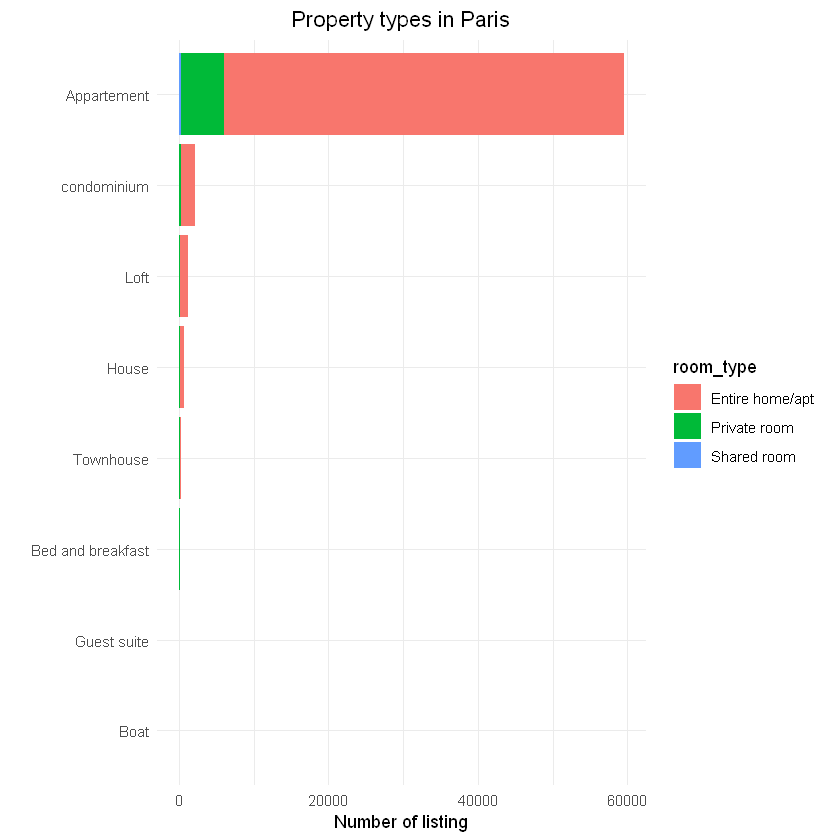

In [22]:
#options(repr.plot.width=12, repr.plot.height=6)
ggplot(Property, aes( x= reorder(property_type,Number_of_listing ), fill= room_type)) +
 geom_bar(stat = "identity", aes(y=Number_of_listing) ) + 
 coord_flip() + xlab("") + ylab("Number of listing") + ggtitle("Property types in Paris") +
  theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
  
  
 
 

# ETUDE 3
### Accomodates(Number of poeple)

### Création d'un nouveau dataset


In [23]:
listing_accommodate <- listings1 %>% filter(property_type!="NA" & property_type != "Hotel" & room_type!= "Hotel room" ) %>% group_by(accommodates) %>% summarise(Number_of_listings = length(id))
listing_accommodate

`summarise()` ungrouping output (override with `.groups` argument)


accommodates Number_of_listings
1   1            2892             
2   2           30999             
3   3            6141             
4   4           16126             
5   5            2534             
6   6            3531             
7   7             477             
8   8             717             
9   9              89             
10 10             205             
11 11              33             
12 12              72             
13 13              18             
14 14              27             
15 15              24             
16 16              27

### Représentation graphique

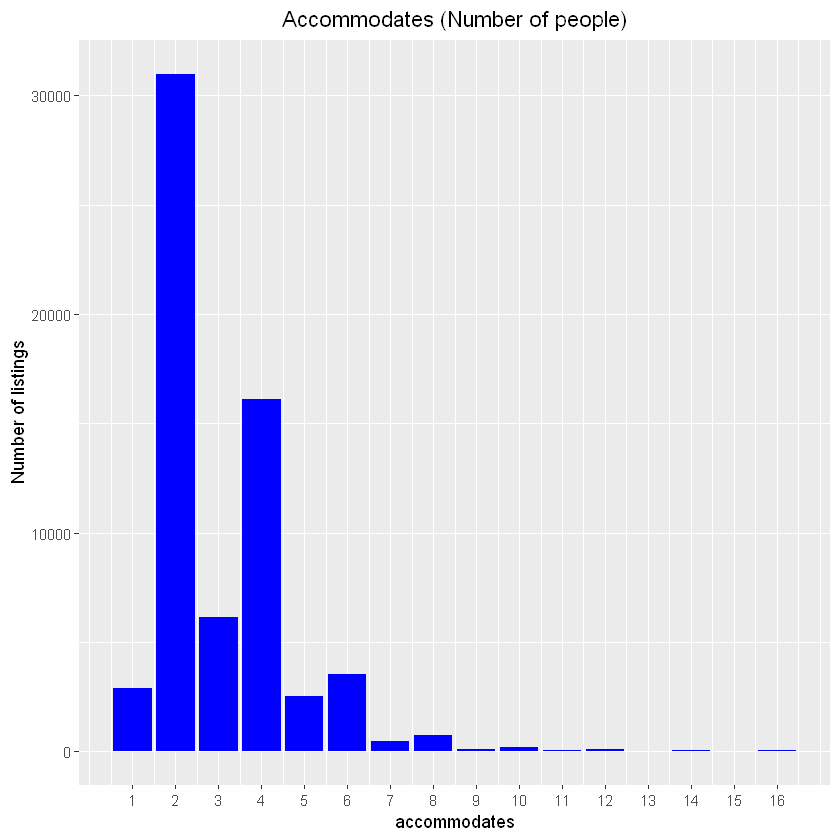

In [24]:
#options(repr.plot.width=12, repr.plot.height=8)
ggplot(listing_accommodate, aes(x=accommodates, y = Number_of_listings )) +
ylab("Number of listings" )  + ggtitle("Accommodates (Number of people)") +
 geom_bar(stat="identity" , fill = "blue")  + scale_x_continuous(breaks=c(1:16)) +
  theme(plot.title = element_text(hjust = 0.5))


# Etude 4 
### Average daily price for a 2-person accommodation
#### Création d'un nouveau dataset

In [25]:
summary(listings1$price)

   Length     Class      Mode 
    66334 character character 

In [26]:
#on extrait une liste des caractères numérique qui forme les prix des listings, puis on transforme cette liste en vecteur 
#et enfin on recode ces élémentsn variable numérique.
listings1$price_dollar <-  str_extract(listings1$price, "\\d+") %>% unlist() %>% as.numeric() 
summary(listings1$price_dollar)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    59.0    80.0   104.5   118.0   999.0 

In [27]:
# conversion dollar euro
listings1 <- listings1 %>% mutate(price_euro = price_dollar * 0.82) 
head(listings1)

id   listing_url                       scrape_id      last_scraped
1 2577 https://www.airbnb.com/rooms/2577 20201012032825 2020-10-19  
2 3109 https://www.airbnb.com/rooms/3109 20201012032825 2020-10-18  
3 4886 https://www.airbnb.com/rooms/4886 20201012032825 2020-10-18  
4 4890 https://www.airbnb.com/rooms/4890 20201012032825 2020-10-14  
5 5396 https://www.airbnb.com/rooms/5396 20201012032825 2020-10-15  
6 7397 https://www.airbnb.com/rooms/7397 20201012032825 2020-10-16  
  name                                            
1 Loft for 4 by Canal Saint Martin                
2 zen and calm                                    
3 Country-Style Studio Hip Area FREE CRUISE & WIFI
4 Quiet Historic & Cute  +Free Cruise             
5 Explore the heart of old Paris                  
6 MARAIS - 2ROOMS APT - 2/4 PEOPLE                
  description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
1 100 m2 loft (1100 sq feet) with high ceiling, open modern kitchen, cable tv, wifi, sleeping space up to 5 people, Republique area, 5 minutes from the St Martin Canal, Marais area, 10 min from Chatelet and the Louvre.<br /><br /><b>The space</b><br />The district has any service or shop you may desire at a walking distance, many restaurants and clubs as well. <br />I will be pleased to suggest our best addresses and give you directions to have a very enjoyable journey. <br />We have 1 separated bedroom and one mezzanine for the second bed. One bathroom is ""en suite"" to the main bedroom. <br />Welcome to our beautiful loft!<br />Karine                                                                                                                                                                                                                                                                                                                                                                     
2 <b>The space</b><br />I bedroom appartment in Paris 14                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
3 Bright and Cozy Studio Apartment for  2 Guests. Enjoy Great Authentic and Central Location near Canal St Martin and Republique. Historic Building with 

In [28]:
summary(listings1$price_euro)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   48.38   65.60   85.67   96.76  819.18 

##### Etudions la répartition du prix des hébergements de 2-personnes

In [29]:
repartition <- listings1 %>%
 filter(property_type!="NA" & property_type != "Hotel" & room_type!= "Hotel room" ) %>%
 filter(accommodates == 2)
 
 

In [30]:
summary(repartition$price_euro)
 sd(repartition$price_euro)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.82   41.00   53.30   61.21   71.34  819.18 

[1] 36.5148

##### dataset des prix moyen des listings de 2 person par quartier

In [31]:
 data_2_person_accomodation <- listings1 %>%
 filter(property_type!="NA" & property_type != "Hotel" & room_type!= "Hotel room" ) %>%
 filter(accommodates == 2) %>% group_by(neighbourhood_cleansed) %>%
 summarise(Average_price = mean(price_euro))
 data_2_person_accomodation


`summarise()` ungrouping output (override with `.groups` argument)


neighbourhood_cleansed Average_price
1  Batignolles-Monceau    59.45038     
2  Bourse                 72.45317     
3  Buttes-Chaumont        47.40082     
4  Buttes-Montmartre      54.87672     
5  Élysée                 80.02177     
6  Entrepôt               58.05055     
7  Gobelins               51.62297     
8  Hôtel-de-Ville         80.72526     
9  Louvre                 80.11459     
10 Luxembourg             79.33475     
11 Ménilmontant           48.02702     
12 Observatoire           55.43816     
13 Opéra                  64.31520     
14 Palais-Bourbon         79.17359     
15 Panthéon               66.23768     
16 Passy                  73.84192     
17 Popincourt             57.59057     
18 Reuilly                53.48568     
19 Temple                 75.31210     
20 Vaugirard              62.14051

### Boxplot compémentaire de visualisation de la répartition des prix des listings de 2-person

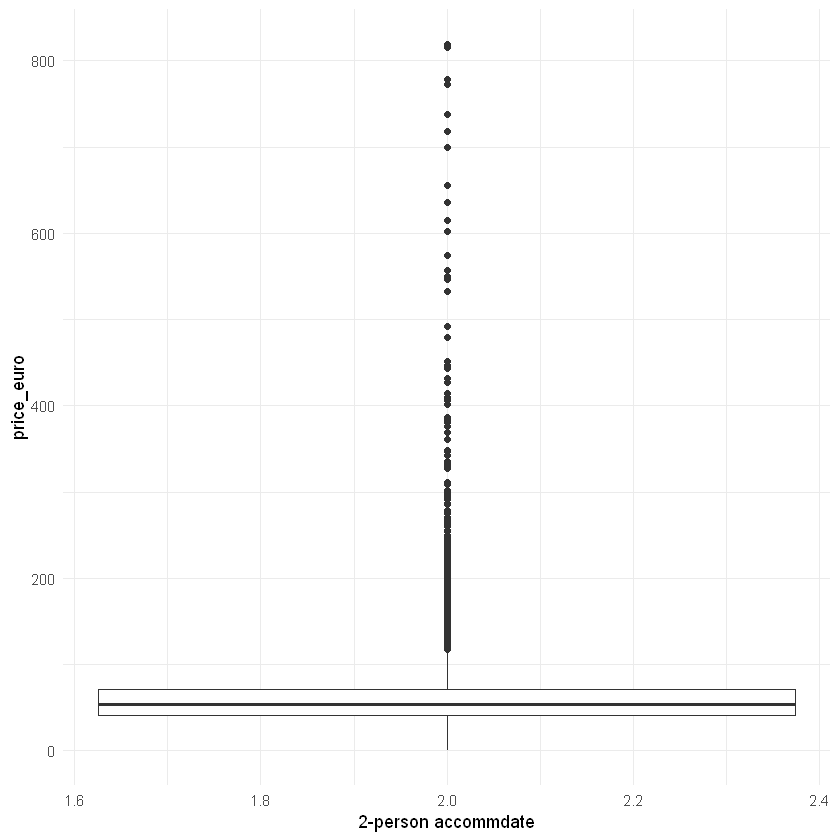

In [32]:
ggplot(repartition, aes(x= accommodates, y= price_euro)) +
geom_boxplot()+
xlab("2-person accommdate") +
theme_minimal()

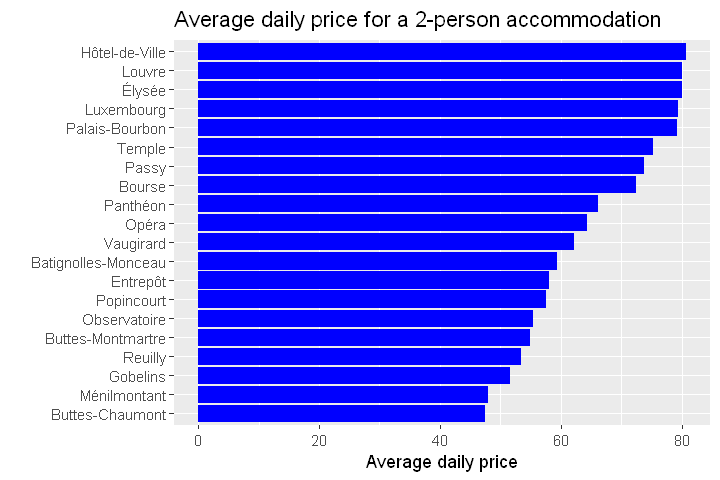

In [33]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot( data_2_person_accomodation, aes(x=Average_price, y= reorder(neighbourhood_cleansed,Average_price)  )) +
geom_bar(stat= "identity", fill="blue") + 
ylab("") + xlab("Average daily price") +
ggtitle("Average daily price for a 2-person accommodation")

#### le prix moyen des hébergements pour 2 personnes est plus alevé dans la zone de l' Hotel de ville suivi du Louvre et à l'Elysee.
#### la zone la moins chère en moyenne pour les hébergements de 2 personnes est à Buttes-Chaumont
##### avec un prix minimum de 0.82 euro et un maximum de 819 euro et une moitié des appartements ayant un prix en dessous de 53.30 euro 

# Etude 5
## Visualisation des données Opensreemap
## Nombre de listings par quartier

In [34]:
#filtrage du dataset sur tous les listings ayant un type commu et qui n'est pas un hotel
PropertyLocation <- listings1 %>% filter(property_type!="NA" & property_type != "Hotel" & room_type!= "Hotel room" ) 


In [35]:
m <- leaflet() %>%
addTiles() %>%
setView(lng=2.3800, lat = 48.8555, zoom= 12) %>%
addCircleMarkers(lng=PropertyLocation$longitude,
                 lat= PropertyLocation$latitude, color="red",
                 weight=1, radius=5, 
                 label = as.character(PropertyLocation$price_euro),
                 clusterOptions = markerClusterOptions(showCoverageOnHover= FALSE))
                 
                 


m

HTML widgets cannot be represented in plain text (need html)

## Etude complémentaire
## Nombre de listings de 2-personnes par quartier

In [37]:
PropertyLocation2 <- PropertyLocation%>% filter(accommodates ==2) 

In [38]:
m2 <- leaflet() %>%
addTiles() %>%
setView(lng=2.3800, lat = 48.8555, zoom= 12) %>%
addCircleMarkers(lng=PropertyLocation2$longitude,
                 lat= PropertyLocation2$latitude, color="red",
                 weight=1, radius=5, 
                 label = as.character(PropertyLocation2$price_euro),
                 clusterOptions = markerClusterOptions(showCoverageOnHover= FALSE))
m2           

HTML widgets cannot be represented in plain text (need html)

# Etude 6
### Visualisation des données Opensreemap

###### Création du dataset contenant le nombre total de listings par quartier

In [39]:
data_areas <- PropertyLocation %>% group_by(neighbourhood_cleansed) %>% summarise(total= length(id))


`summarise()` ungrouping output (override with `.groups` argument)


In [40]:
map1<-readOGR("neighbourhoods.geojson", use_iconv = TRUE, encoding = 'UTF-8' )
map1$neighbourhood


OGR data source with driver: GeoJSON 
Source: "C:\Users\user\neighbourhoods.geojson", layer: "neighbourhoods"
with 20 features
It has 2 fields


[1] Batignolles-Monceau Palais-Bourbon      Buttes-Chaumont    
 [4] Opéra               Entrepôt            Gobelins           
 [7] Vaugirard           Reuilly             Louvre             
[10] Luxembourg          Élysée              Temple             
[13] Ménilmontant        Panthéon            Passy              
[16] Observatoire        Popincourt          Bourse             
[19] Buttes-Montmartre   Hôtel-de-Ville     
20 Levels: Batignolles-Monceau Bourse Buttes-Chaumont ... Vaugirard

###### Vérifions si les locatin dans le dataset sont les memes que celles du fichier  "neighbourhoods.geojson"

In [41]:
is.element(map1$neighbourhood, data_areas$neighbourhood_cleansed)
is.element( data_areas$neighbourhood_cleansed, map1$neighbourhood)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE

##### j'ordonne les 2 sources de données de tel sorte que les noms des quartiers soient parfaitement correspondant

In [42]:
map1 <- subset( map1, is.element(map1$neighbourhood, data_areas$neighbourhood_cleansed ))
data_areas <- data_areas[order(match(data_areas$neighbourhood_cleansed, map1$neighbourhood)),]

###### Je crée la variable bins dont l'étendu contient l'ensemble des valeurs total du nombre de listings contenu dans le datset data_areas ("total") , ensuite je crée la fonction pal contenant en  parametre la palette de couleur , les donée associées et la plage de valeur pour la distribution de couleur


In [43]:
bins <- c(1200, 2000, 2800,3600, 4400,5200, 6000, 6800, 7400)
pal <- colorBin("YlOrRd", domain= data_areas$neighbourhood_cleansed, bins=bins)

#####  je crée la variable labels contenant les informations interactive à afficher

In [44]:
labels <- paste("<p>", data_areas$neighbourhood_cleansed, "<p>",
                "<p>", "number of listings:",data_areas$total, "<p>", sep=" " )


###### Création de la carte chloroplete représentant le nombre de listing par quartier

In [45]:
chrMap <- leaflet() %>%
  setView(lng=2.3800, lat = 48.8555, zoom= 12) %>%
  addTiles() %>%
  addPolygons( data= map1,
               weight = 1,
               smoothFactor = 0.5,
               color= "white",
               fillOpacity = 0.8,
               fillColor = pal(data_areas$total),
               highlight = highlightOptions(
                 weight = 5,
                 color= "#666666" ,
                 fillOpacity= 0.7,
                 bringToFront= TRUE
               ),
               label= lapply(labels, HTML)) %>%
  addLegend(pal=pal,
            values = data_areas$total,
            opacity = 0.7,
            position = "topright")

chrMap


HTML widgets cannot be represented in plain text (need html)

### Etude Complémentaire 6-2 
###### Prix moyen des listings par quartier

Création d'un nouveau dataset

In [46]:
data_average_price <- listings1 %>%
 filter(property_type!="NA" & property_type != "Hotel" & room_type!= "Hotel room" )  %>%
group_by(neighbourhood_cleansed) %>%
 summarise(Average_priceN = mean(price_euro))
 data_average_price

`summarise()` ungrouping output (override with `.groups` argument)


neighbourhood_cleansed Average_priceN
1  Batignolles-Monceau     77.44913     
2  Bourse                 108.05077     
3  Buttes-Chaumont         60.22010     
4  Buttes-Montmartre       66.26251     
5  Élysée                 137.80752     
6  Entrepôt                76.81823     
7  Gobelins                66.36985     
8  Hôtel-de-Ville         110.34911     
9  Louvre                 118.53710     
10 Luxembourg             123.10054     
11 Ménilmontant            59.70165     
12 Observatoire            72.20667     
13 Opéra                   88.47406     
14 Palais-Bourbon         117.61238     
15 Panthéon                92.74921     
16 Passy                  113.54367     
17 Popincourt              72.45794     
18 Reuilly                 68.36850     
19 Temple                 105.94832     
20 Vaugirard               80.09192

In [47]:
is.element(map1$neighbourhood, data_average_price$neighbourhood_cleansed)
is.element( data_average_price$neighbourhood_cleansed, map1$neighbourhood)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE

In [49]:
map1 <- subset( map1, is.element(map1$neighbourhood, data_average_price $neighbourhood_cleansed ))
data_areas <- data_areas[order(match(data_average_price$neighbourhood_cleansed, map1$neighbourhood)),]

In [50]:
bins1 <- c(55, 67, 79,90, 100,110, 120, 130, 140)
pal1 <- colorBin("YlOrRd", domain= data_average_price$neighbourhood_cleansed, bins=bins1)

In [51]:
chrMapPrice <- leaflet() %>%
  setView(lng=2.3800, lat = 48.8555, zoom= 12) %>%
  addTiles() %>%
  addPolygons( data= map1,
               weight = 1,
               smoothFactor = 0.5,
               color= "white",
               fillOpacity = 0.8,
               fillColor = pal1(data_average_price$Average_priceN),
               highlight = highlightOptions(
                 weight = 5,
                 color= "#666666" ,
                 fillOpacity= 0.7,
                 bringToFront= TRUE
               ),
               label= lapply(labels, HTML)) %>%
  addLegend(pal=pal1,
            values = data_average_price$Average_priceN,
            opacity = 0.7,
            position = "topright")

chrMapPrice

HTML widgets cannot be represented in plain text (need html)

#### Suite à des bugs liées à la puissance de calcul qui fait défaut sur ma machine , je continu les études 7 et 8 et une étude complémentaire dans un second fichier que je joins à celui ci